In [1]:
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

## Validation of efficiencies for a 1.4 TeV gluino and a 100 GeV neutralino

#### ATLAS Values

In [2]:
nobs = 0
bg = 0.02
bg_error = 0.02
lum = 32.7
xsecSRlimit = 0.0914421298569*1e-3 #(pb) From  statistics.upperLimit(0,0.02,0.02,32.7)
#gluino xsection at mgluino=1400: 25.2977*fb, weight for 1k events = 0.8272
atlasULs = np.genfromtxt('../ATLAS_data/HEPData-ins1630632-v2-csv/Table7.csv',
                         delimiter=',',names=True,skip_header=10,skip_footer=60)

#### Recasting values

In [3]:
recastData = pd.read_pickle('./gluino_all.pcl')
# Restrict to mLSP = 100
recastData = recastData[(recastData['mLLP'] == 1400.0)]
recastData = recastData[(recastData['mLSP'] == 100.0)]

In [4]:
# Add sigma_UL
recastData['UL'] = xsecSRlimit/recastData['AccEff']

In [5]:
#Compute ratios
ratio = []
atlasULF = interp1d(atlasULs['Lifetime_ns'],atlasULs['Observed_limit_pb'],fill_value='extrapolate',bounds_error=False)
for irow,row in recastData.iterrows():
    tau = row['tau_ns']    
    ratio.append([tau,row['UL']/atlasULF(tau)])
ratio = np.array(ratio)

#### Compare values

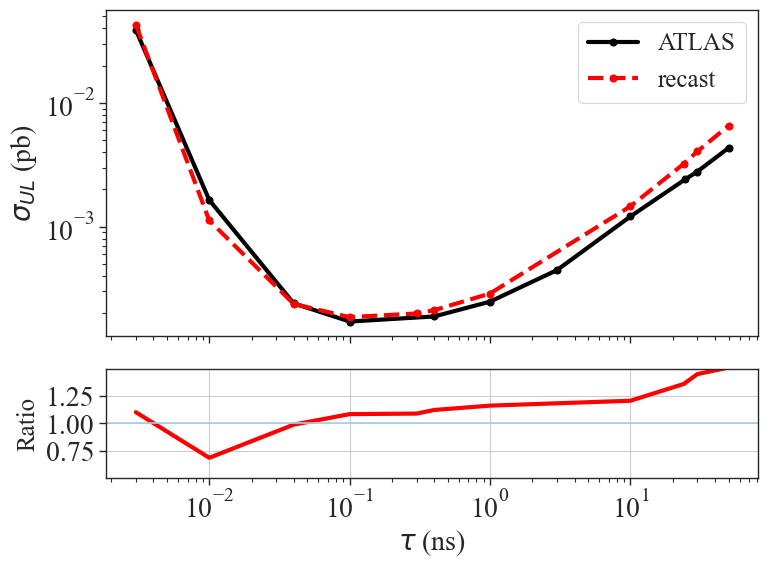

In [6]:
#Define subplots and their properties:
f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[3, 1]},figsize=(8,6))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#Plot curves
axarr[0].plot(atlasULs['Lifetime_ns'],atlasULs['Observed_limit_pb'],'o-',color='black',linewidth=3.0,label='ATLAS')
axarr[0].plot(recastData['tau_ns'],recastData['UL'],'o--',color='red',linewidth=3.0,label='recast')
axarr[0].set_ylabel(r'$\sigma_{UL}$ (pb)', fontsize=20)
axarr[0].set_yscale('log')
axarr[0].set_xscale('log')
axarr[0].tick_params(labelsize=20)

#Plot ratio
axarr[1].plot(ratio[:,0],ratio[:,1],color='red',linewidth=3.0)
axarr[1].axhline(y=1.)
axarr[1].set_ylabel('Ratio', fontsize=18) #Y-label
axarr[1].set_xscale('log')
axarr[1].set_xlabel(r'$\tau$ (ns)', fontsize=20)
axarr[1].set_ylim(0.5,1.5)
axarr[1].set_yticks([0.75,1.0,1.25])
axarr[1].grid(True)
axarr[1].tick_params(labelsize=20)
axarr[0].legend(fontsize=18)
f.tight_layout()
plt.show()

In [7]:
f.savefig('validationPlot_mlsp100.png')